In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
train_data = pd.read_csv('./GiveMeSomeCredit/cs-training.csv')
test_data = pd.read_csv('./GiveMeSomeCredit/cs-test.csv')
train_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Data Dictionary:

SeriousDlqin2yrs: Person experienced 90 days past due delinquency or worse

RevolvingUtilizationOfUnsecuredLines: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

age: Age of borrower in years

NumberOfTime30-59DaysPastDueNotWorse: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

DebtRatio: Monthly debt payments, alimony,living costs divided by monthy gross income

MonthlyIncome: Monthly income

NumberOfOpenCreditLinesAndLoans: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

NumberOfTimes90DaysLate: Number of times borrower has been 90 days or more past due.

NumberRealEstateLoansOrLines: Number of mortgage and real estate loans including home equity lines of credit

NumberOfTime60-89DaysPastDueNotWorse: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

NumberOfDependents: Number of dependents in family excluding themselves (spouse, children etc.)

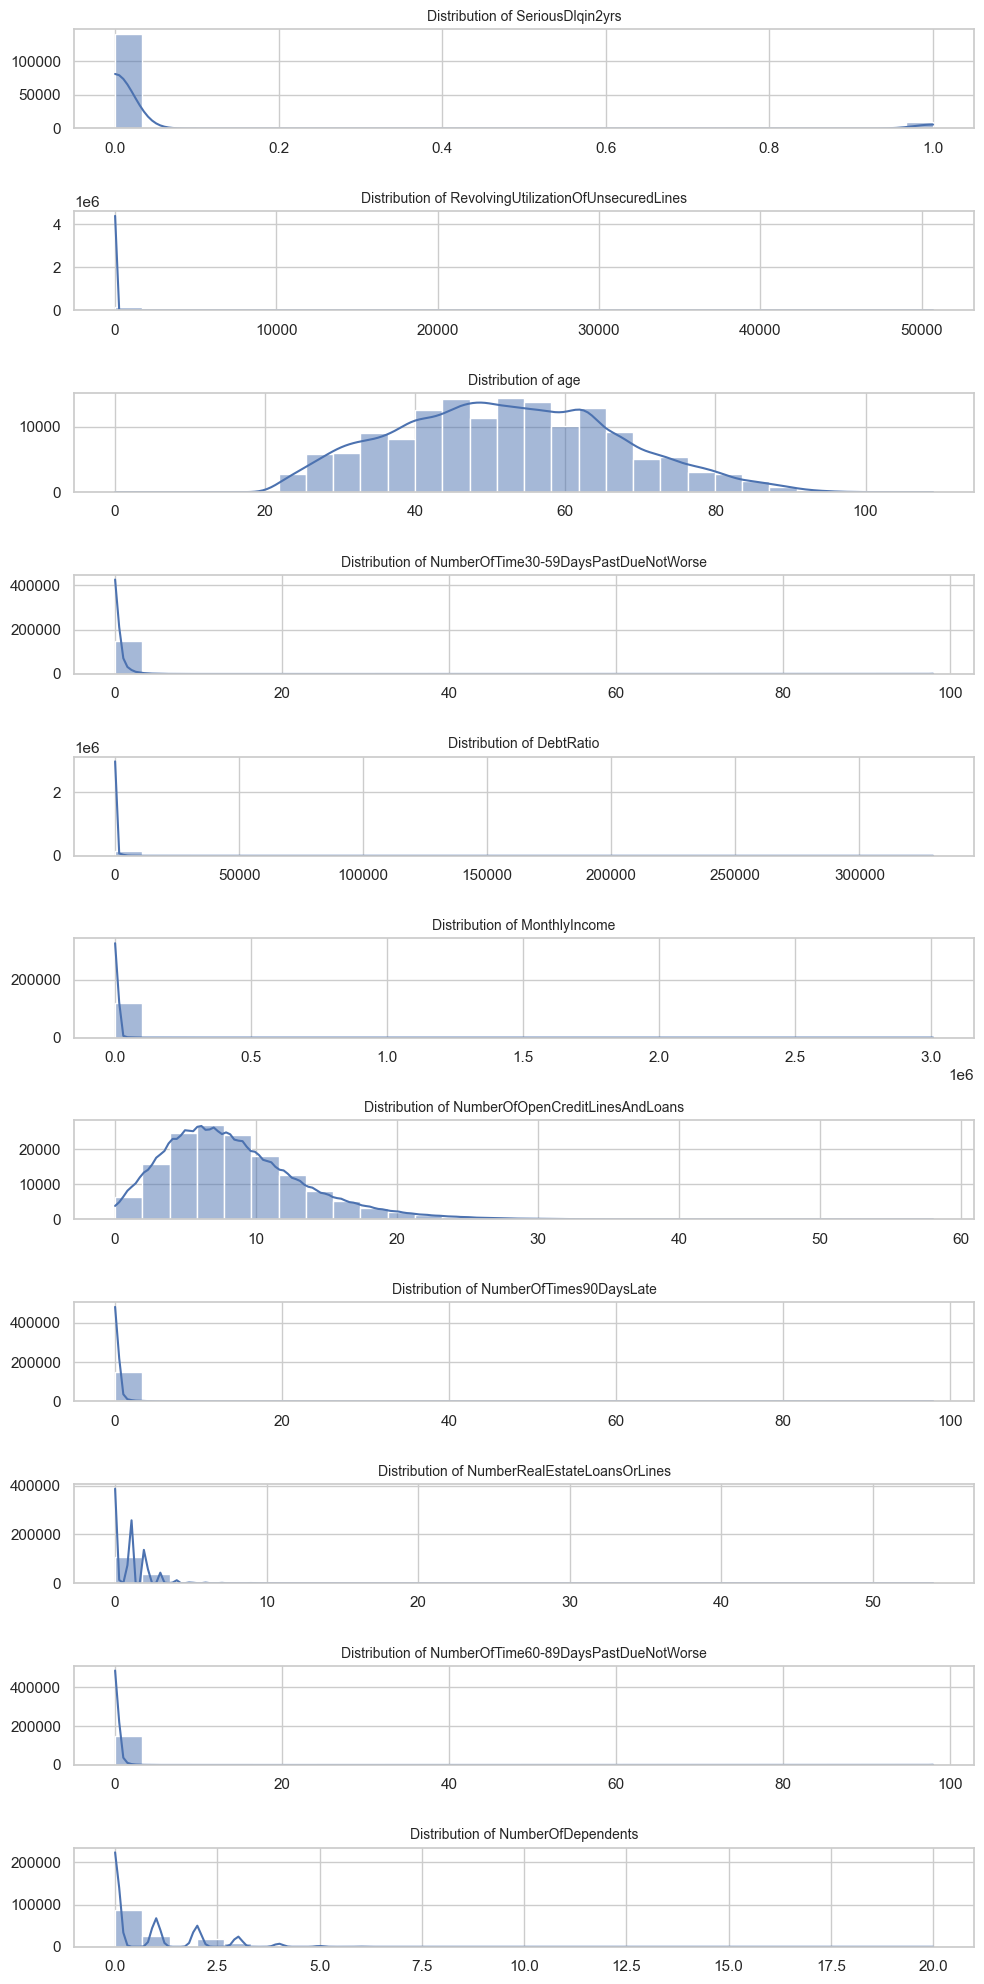

In [7]:
sns.set(style="whitegrid")

columns_to_plot = train_data.columns[1:]

fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 20))

for i, col in enumerate(columns_to_plot):
    sns.histplot(train_data[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [8]:
summary_statistics = train_data.describe()

missing_values = train_data.isnull().sum()
summary_statistics.loc['missing'] = missing_values

summary_statistics

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000
missing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.973100e+04,0.000000,0.000000,0.000000,0.000000,3924.000000


Preprocessing

In [45]:
features = train_data.columns[2:]
X = train_data[features]
y = train_data['SeriousDlqin2yrs']

imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

weights = {
    'NumberOfTime30-59DaysPastDueNotWorse': 1,
    'NumberOfTime60-89DaysPastDueNotWorse': 2,
    'NumberOfTimes90DaysLate': 4
}

X_imputed['WeightedDelinquencies'] = (
    X_imputed['NumberOfTime30-59DaysPastDueNotWorse'] * weights['NumberOfTime30-59DaysPastDueNotWorse'] +
    X_imputed['NumberOfTime60-89DaysPastDueNotWorse'] * weights['NumberOfTime60-89DaysPastDueNotWorse'] +
    X_imputed['NumberOfTimes90DaysLate'] * weights['NumberOfTimes90DaysLate']
)

X_imputed_reduced = X_imputed.drop(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'], axis=1)

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_imputed_reduced)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [46]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_imputed_reduced.columns
vif_data["VIF"] = [variance_inflation_factor(X_imputed_reduced.values, i) for i in range(len(X_imputed_reduced.columns))]

print(vif_data)

                                feature       VIF
0  RevolvingUtilizationOfUnsecuredLines  1.000777
1                                   age  3.624587
2                             DebtRatio  1.049540
3                         MonthlyIncome  1.269625
4       NumberOfOpenCreditLinesAndLoans  4.506326
5          NumberRealEstateLoansOrLines  2.303635
6                    NumberOfDependents  1.399108
7                 WeightedDelinquencies  1.004255


SVM

In [47]:
clf = SVC(kernel='rbf', C=1, random_state=42, probability=True)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [48]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.7947594183723562


Random Forest

In [49]:
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [61]:
feature_importances_rf = pd.Series(rf_classifier.feature_importances_, index=X_imputed_reduced.columns).sort_values(ascending=False)
print(feature_importances_rf)

RevolvingUtilizationOfUnsecuredLines    0.249463
WeightedDelinquencies                   0.222050
DebtRatio                               0.140538
age                                     0.124279
MonthlyIncome                           0.116758
NumberOfOpenCreditLinesAndLoans         0.082315
NumberRealEstateLoansOrLines            0.032516
NumberOfDependents                      0.032082
dtype: float64


In [50]:
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {auc_score}")

ROC AUC Score: 0.8400686501550731


In [65]:
y_pred = rf_classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print(f"Classification Report for Random Forest Model:\n{report}")

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     28044
           1       0.55      0.15      0.24      1956

    accuracy                           0.94     30000
   macro avg       0.75      0.57      0.60     30000
weighted avg       0.92      0.94      0.92     30000



Logistic Regression

In [57]:
logistic_regression_model = LogisticRegression(class_weight='balanced', penalty='l2', C=1, max_iter=1000, random_state=42)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000, random_state=42)

In [58]:
y_pred_probabilities = logistic_regression_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_probabilities)
print(f"ROC AUC Score: {auc_score}")

ROC AUC Score: 0.7865794228117721


Gradient Boosting

In [59]:
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [62]:
feature_importances_gb = pd.Series(gradient_boosting_model.feature_importances_, index=X_imputed_reduced.columns).sort_values(ascending=False)
print(feature_importances_gb)

WeightedDelinquencies                   0.782881
RevolvingUtilizationOfUnsecuredLines    0.149602
age                                     0.018764
DebtRatio                               0.018611
NumberOfOpenCreditLinesAndLoans         0.011742
NumberRealEstateLoansOrLines            0.009231
MonthlyIncome                           0.007461
NumberOfDependents                      0.001709
dtype: float64


In [60]:
y_pred_probabilities = gradient_boosting_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_probabilities)
print(f"ROC AUC Score: {auc_score}")

ROC AUC Score: 0.8636589168671258


In [66]:
y_pred = gradient_boosting_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(f"Classification Report for Gradient Boosting Model:\n{report}")

Classification Report for Gradient Boosting Model:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.58      0.20      0.30      1956

    accuracy                           0.94     30000
   macro avg       0.76      0.59      0.63     30000
weighted avg       0.92      0.94      0.92     30000



Testing

In [ ]:
features_test = test_data.columns[2:]

X_test_imputed = pd.DataFrame(imputer.transform(test_data[features_test]), columns=features_test)

X_test_imputed['WeightedDelinquencies'] = (
    X_test_imputed['NumberOfTime30-59DaysPastDueNotWorse'] * weights['NumberOfTime30-59DaysPastDueNotWorse'] +
    X_test_imputed['NumberOfTime60-89DaysPastDueNotWorse'] * weights['NumberOfTime60-89DaysPastDueNotWorse'] +
    X_test_imputed['NumberOfTimes90DaysLate'] * weights['NumberOfTimes90DaysLate']
)

X_test_imputed_reduced = X_test_imputed.drop(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'], axis=1)

X_test_scaled = scaler.transform(X_test_imputed_reduced)

test_probabilities = gradient_boosting_model.predict_proba(X_test_scaled)[:, 1]

submission_df = pd.DataFrame({
    'Id': test_data['Unnamed: 0'], 
    'Probability': test_probabilities
})

submission_df.to_csv('submission.csv', index=False)